# **Ejercicio**
**Josefina Valenzuela L.**

*Diplomado Data Engineer*
*USACH*
*(Módulo Machine Learning)*

## **Diagnóstico de enfermedad cardíaca**

**Variables**

* **Age:** edad del paciente (años)
* **Sex:** 1 hombre, 0 mujer.
* **cp:** tipo de dolor de pecho (0 = típoco anginoso, 1 = atípico anginoso, 2 = no anginoso, 3 = asintomático).
* **trestbps:** presión arterial en reposo (mm Hg).
* **restecg:** resultados del electrocardiograma en reposo (0 = normal, 1 = anomalía, 2 = hpertrofia ventricular izquierda).
* **thalach:** frecuencia cardíaca máxima alcanzada.
* **exang:** angina indicida por ejercicio (1 = sí; 0 = no).
* **oldpeak:** depresión del ST inducida por el ejercicio respecto al reposo.
* **slope:** pendiente del segmento ST durante el ejercicio (0 = ascendente; 1 = plano; 2 = descendente).
* **ca:** número de vasos principales coloreados por fluoroscopía (0-3).
* **thal:** resultado de la prueba de esfuerzo con talio (3 = normal; 6 = defecto fijo; 7 = defecto reversible).
* **target:** diagnóstico de enfermedad cardíaca (0 = no presente; 1-4 = presenta).

In [ ]:
import numpy as np
import pandas as pd

# URL del dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nombres de las columnas según la documentación
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Cargar el dataset
df = pd.read_csv(url, names=column_names)

# Mostrar las primeras filas
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
# Resumen estadístico
print("Resumen estadístico variables numéricas:")
df.describe(include='number')

Resumen estadístico variables numéricas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:

print("Resumen estadístico variables categóricas:")
df.describe(include='object')

Resumen estadístico variables categóricas:


,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


**Variables que deberían ser tratadas como categóricas:**
* Binarias:
  * sex
  * fbs
  * exang
* Multiclase:
  * cp
  * restecg
  * slope
  * ca
  * thal



In [ ]:
# Dejamos la variable objetivo como binaria.
df.loc[df['target'] > 1, 'target'] = 1

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (y):")
print(df['target'].value_counts()/df['target'].shape[0])


Distribución de la variable objetivo (y):
target
0    0.541254
1    0.458746
Name: count, dtype: float64


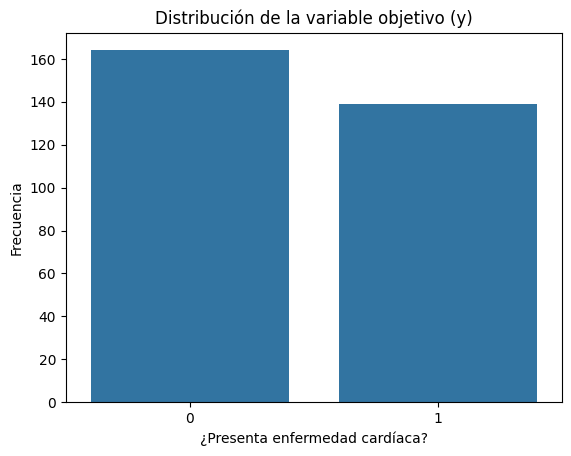

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualización: distribución de la variable objetivo
sns.countplot(x='target', data=df)
plt.title('Distribución de la variable objetivo (y)')
plt.xlabel('¿Presenta enfermedad cardíaca?')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los pacientes no presenta enfermedad cardíaca. Proporción aproximada: 54% 0 vs 46% 1.

**Verificación de valores nulos**


In [ ]:
print("Valores nulos por columna:")
df.isnull().sum()

Valores nulos por columna:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Si bien no hay valores nulos, se visualizan "?" en variables categóricas del dataset

In [ ]:
df[df['ca']=='?']['ca'].count()/df.shape[0]

np.float64(0.013201320132013201)

In [ ]:
df[df['thal']=='?']['thal'].count()/df.shape[0]

np.float64(0.006600660066006601)

**Age**

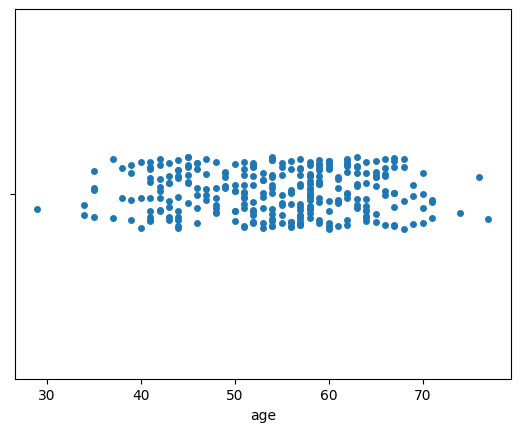

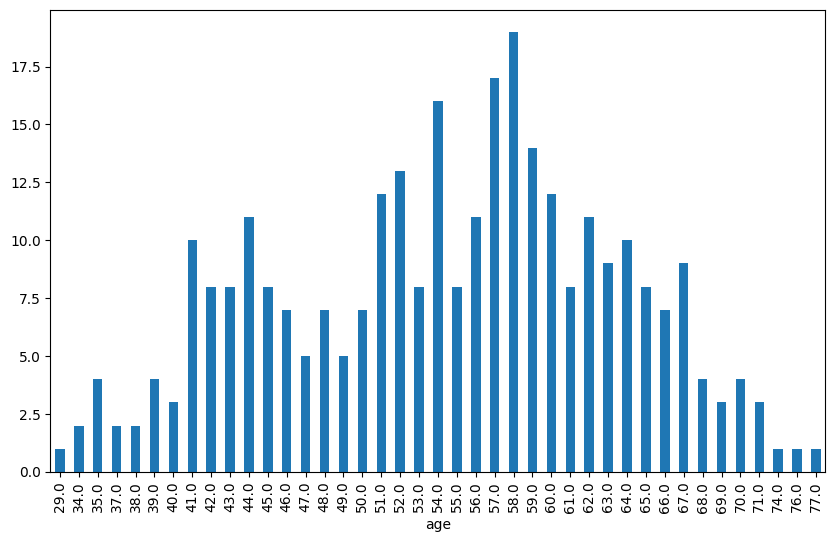

/tmp/ipython-input-864869040.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-864869040.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


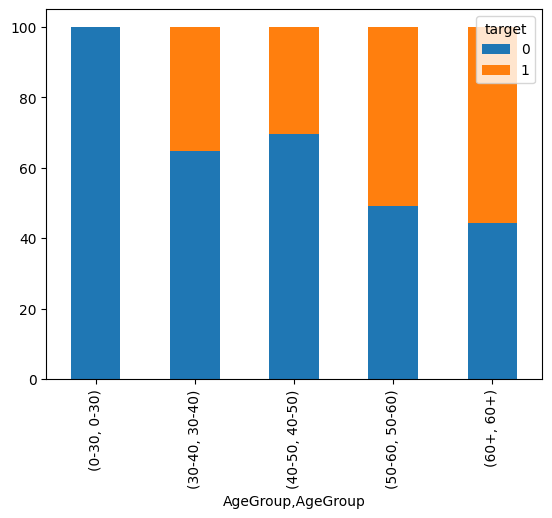

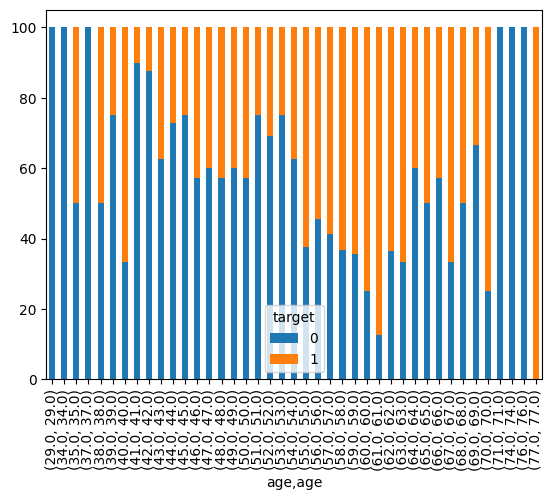

----------------------------------------------------------------------
Mínimo:  29.0
Máximo:  77.0


In [ ]:
import seaborn as sn
sn.stripplot(x='age', data=df)
plt.show()


df['age'] = df['age'].round(0)
df['age'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('age')
plt.show()

# Agrupar la variable 'Age' en rangos
bins = [0, 30, 40, 50, 60,  df['age'].max()]
labels = ['0-30', '30-40', '40-50', '50-60',  '60+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['AgeGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()


df.groupby(['age', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

print("----------------------------------------------------------------------")
print("Mínimo: ", df['age'].min())
print("Máximo: ", df['age'].max())

* La edad se distribuye entre 29 y 77 años.
* Se observa una tendencia a medida que aumenta la edad mayor probabilidad de sufrir enfermedades cardíacas.

**sex**

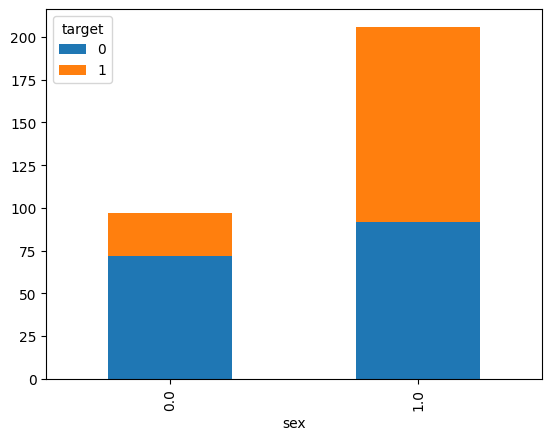

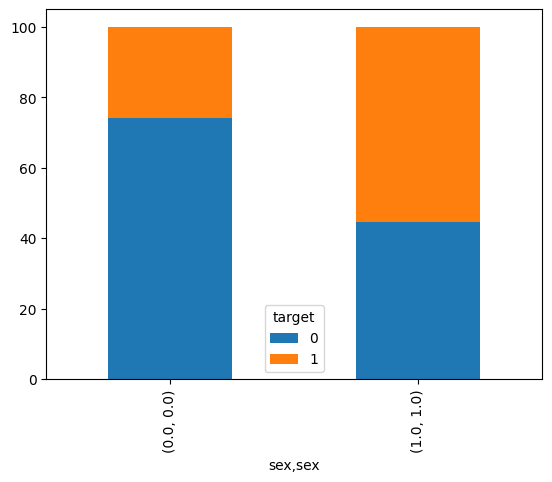

In [ ]:
from os import defpath
df.groupby(['sex', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['sex', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

* Hay más hombres que mujeres en la muestra.
* Se observa que hombres tienden a presenta mayor probabilidades de enfermedades cardíacas que muejeres.

**cp: tipo de dolor de pecho**
(0 = típoco anginoso, 1 = atípico anginoso, 2 = no anginoso, 3 = asintomático)

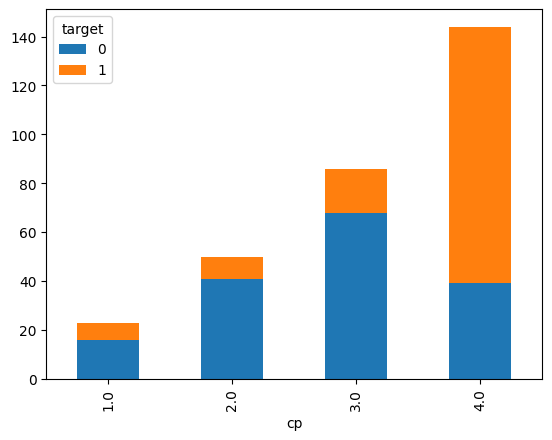

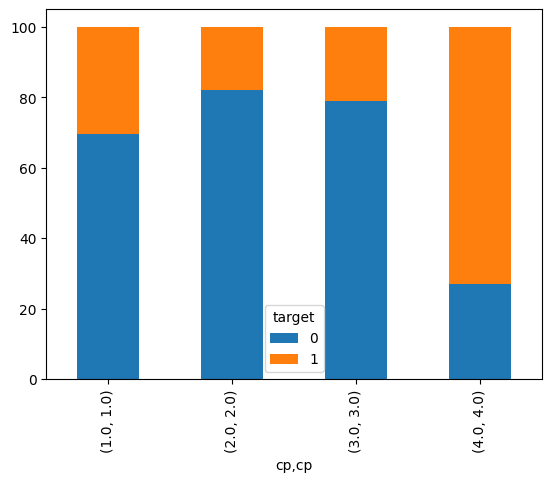

In [ ]:
from os import defpath
df.groupby(['cp', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['cp', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

* No es una variable ordinal
* Si se observa una diferencia entre clases.
  * Asintomático: presenta mayor probabilidad de enfermedad que cardiaca.
  * Seguido por Ttípico Anginoso.
  * Atípico anginoso y No anginoso presenta una probabilidad similar.

**trestbps:** presión arterial en reposo (mm Hg).

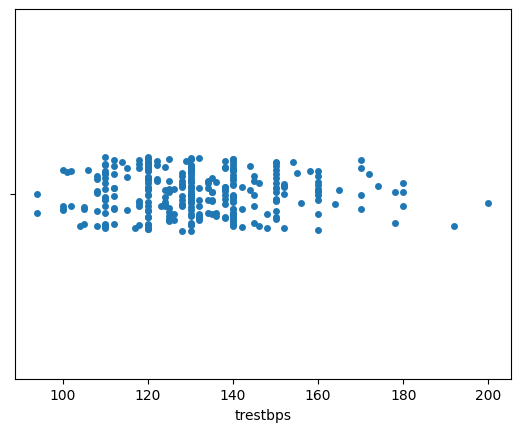

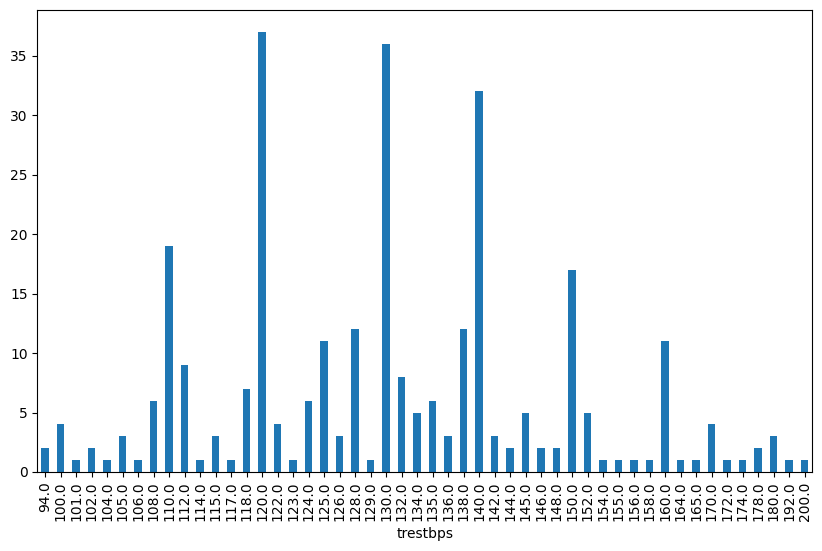

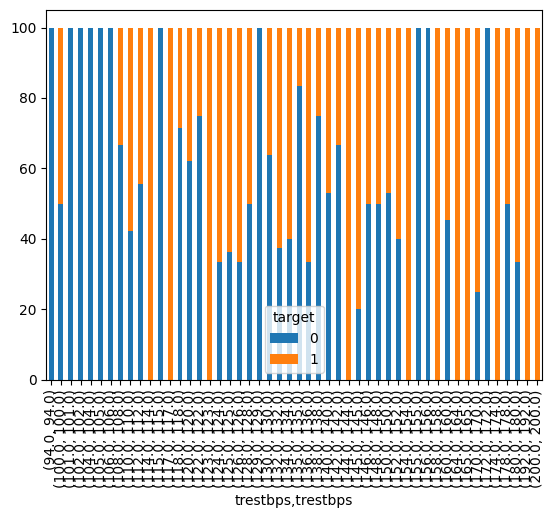

----------------------------------------------------------------------
Mínimo:  94.0
Máximo:  200.0


In [ ]:
import seaborn as sn
sn.stripplot(x='trestbps', data=df)
plt.show()


df['trestbps'] = df['trestbps'].round(0)
df['trestbps'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('trestbps')
plt.show()


df.groupby(['trestbps', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

print("----------------------------------------------------------------------")
print("Mínimo: ", df['trestbps'].min())
print("Máximo: ", df['trestbps'].max())

/tmp/ipython-input-3089300281.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['trestbpsGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-3089300281.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['trestbpsGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


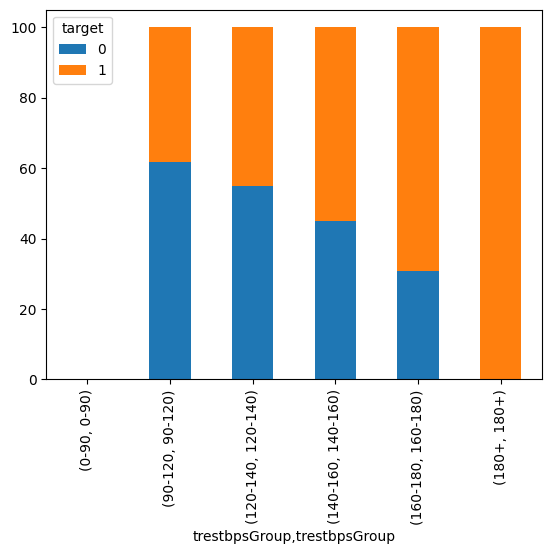

In [ ]:
bins = [0, 90, 120, 140, 160,  180, df['trestbps'].max()]
labels = ['0-90', '90-120', '120-140', '140-160', '160-180',  '180+']
df['trestbpsGroup'] = pd.cut(df['trestbps'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['trestbpsGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()



Se observa una fuerte correlación que a mayor frecuencia cardiaca en reposo, mayor probabilidad de enfermedad cardíaca.

restecg: resultados del electrocardiograma en reposo (0 = normal, 1 = anomalía, 2 = hipertrofia ventricular izquierda).

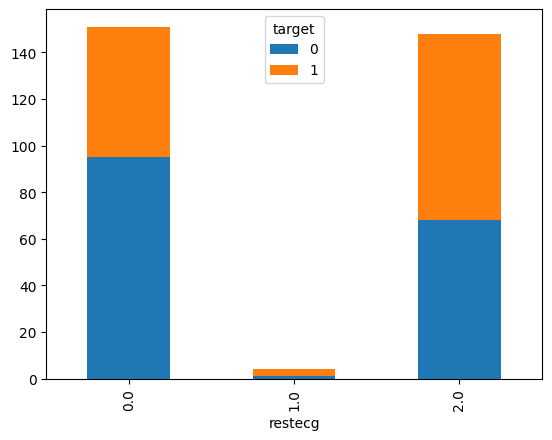

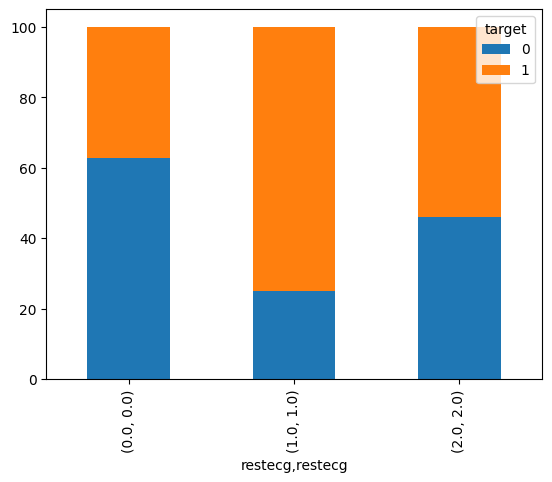

In [ ]:
df.groupby(['restecg', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['restecg', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

* Se observa que la frecuencia de anomalias son poco significativas.
* anomalias presentan mayor probabilidad de enfermedad cardíaca.
* Seguido por hipertrofia ventricular izquierda
* Y normal es la que presenta menor probabiidad de enfermedad cardíaca.

**thalach: frecuencia cardíaca máxima alcanzada.**

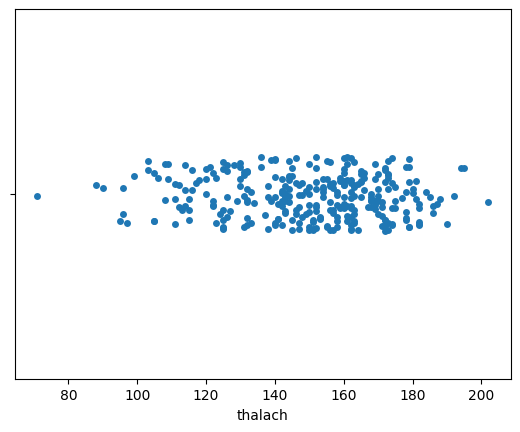

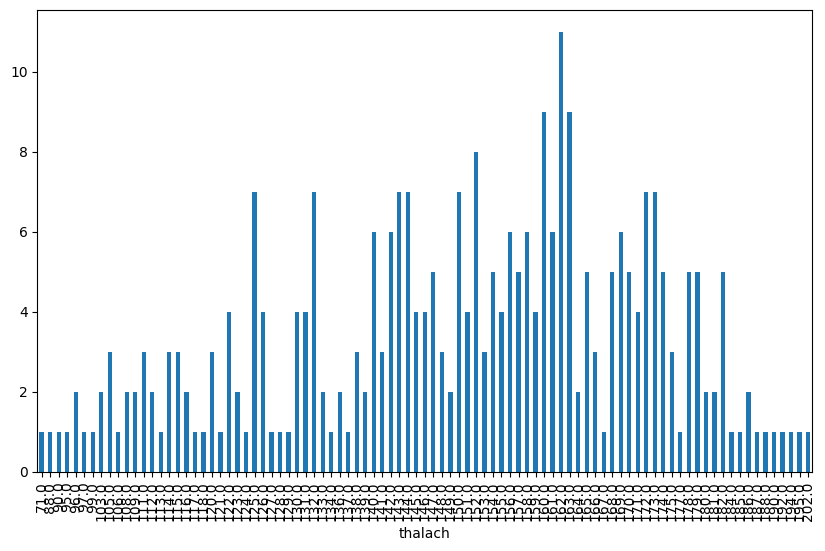

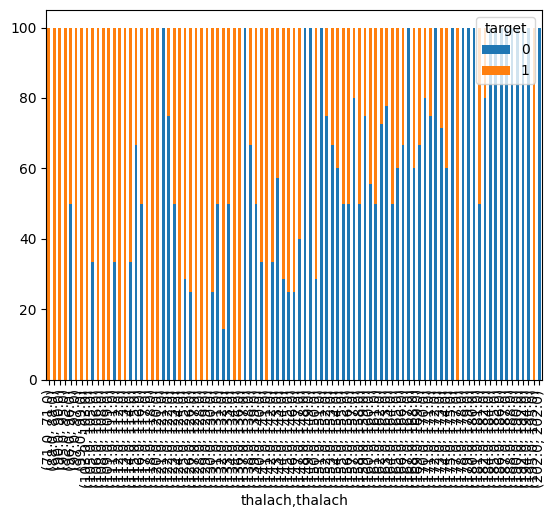

----------------------------------------------------------------------
Mínimo:  71.0
Máximo:  202.0


In [ ]:
import seaborn as sn
sn.stripplot(x='thalach', data=df)
plt.show()


df['thalach'] = df['thalach'].round(0)
df['thalach'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('thalach')
plt.show()


df.groupby(['thalach', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

print("----------------------------------------------------------------------")
print("Mínimo: ", df['thalach'].min())
print("Máximo: ", df['thalach'].max())


/tmp/ipython-input-1774784692.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['thalachGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-1774784692.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['thalachGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


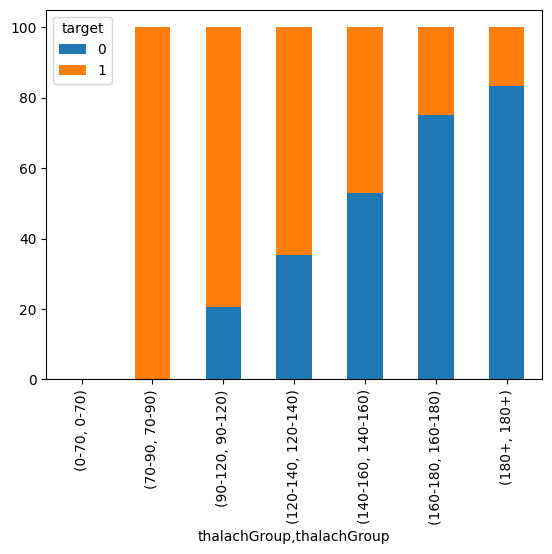

In [ ]:
bins = [0, 70, 90, 120, 140, 160,  180, df['thalach'].max()]
labels = ['0-70', '70-90', '90-120', '120-140', '140-160', '160-180',  '180+']
df['thalachGroup'] = pd.cut(df['thalach'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['thalachGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()



Ha menor frecuencia cardiaca máxima, mayor probabilidad de enfermedad cardíaca.


* **exang:** angina inducida por ejercicio (1 = sí; 0 = no).

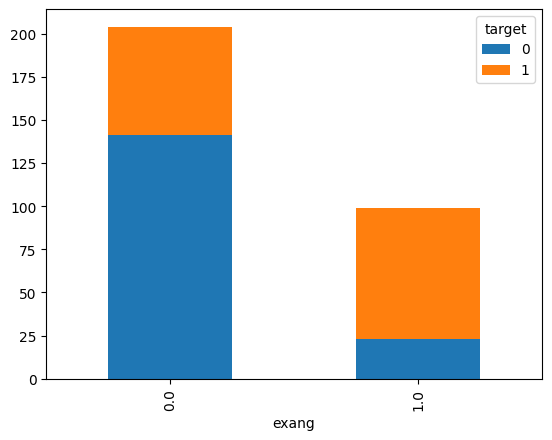

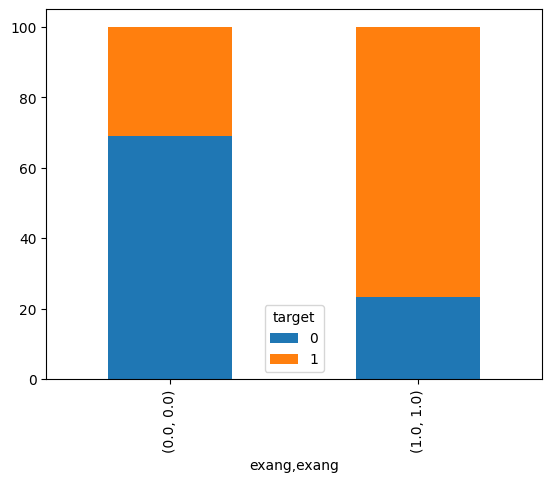

In [ ]:
df.groupby(['exang', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['exang', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

Si presenta Angina inducida por ejercicio mayor probabilidad de presentar enfermedad cardíaca.

* **oldpeak:** depresión del ST inducida por el ejercicio respecto al reposo.

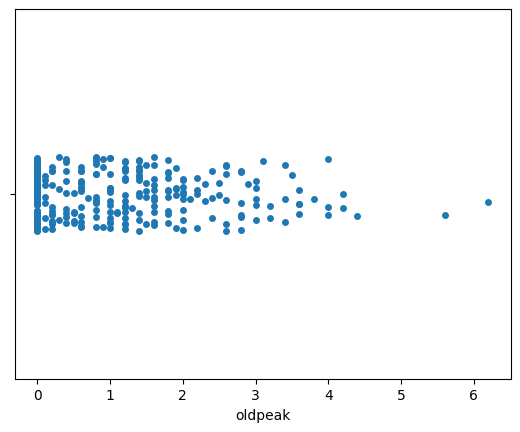

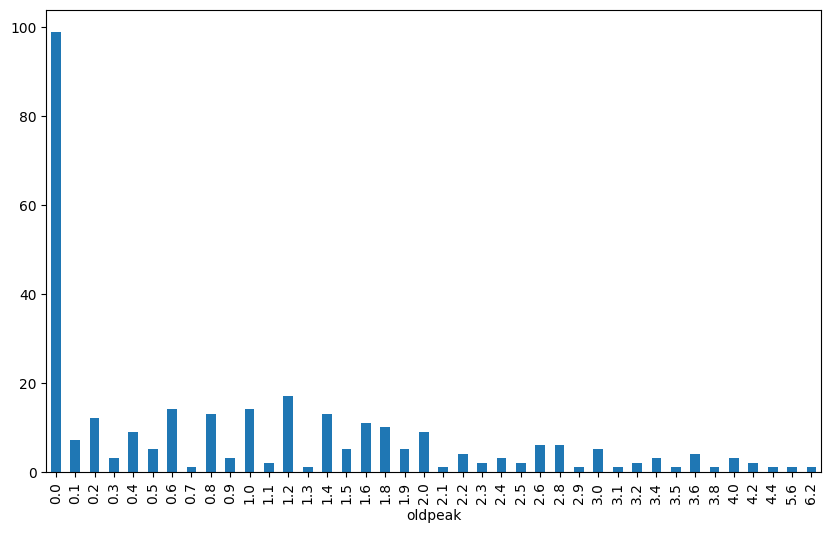

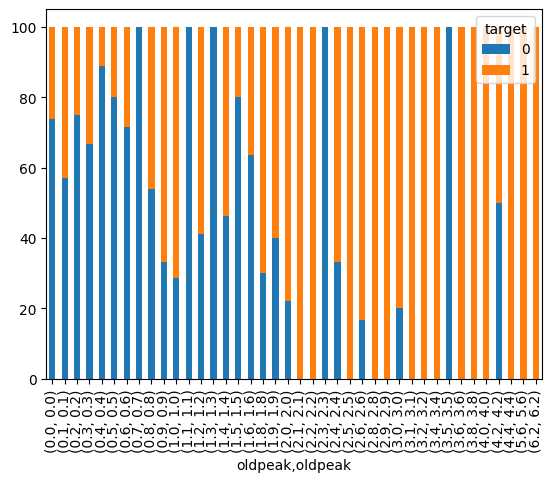

----------------------------------------------------------------------
Mínimo:  0.0
Máximo:  6.2


In [ ]:
sn.stripplot(x='oldpeak', data=df)
plt.show()


#df['oldpeak'] = df['oldpeak'].round(0)
df['oldpeak'].value_counts().sort_index().plot.bar(figsize=(10,6))
plt.xlabel('oldpeak')
plt.show()


df.groupby(['oldpeak', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

print("----------------------------------------------------------------------")
print("Mínimo: ", df['oldpeak'].min())
print("Máximo: ", df['oldpeak'].max())

/tmp/ipython-input-2365195233.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['oldpeakGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-2365195233.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['oldpeakGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


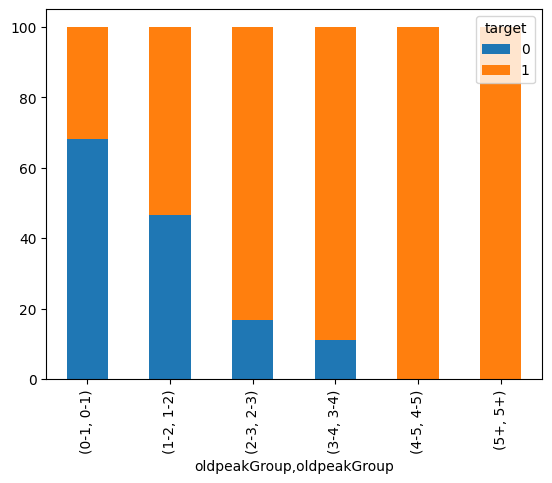

In [ ]:
bins = [0, 1, 2, 3, 5, 6, df['oldpeak'].max()]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
df['oldpeakGroup'] = pd.cut(df['oldpeak'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['oldpeakGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()



A medida que imcrementa la depresión del ST inducida por el ejercicio respecto al reposo, mayor probabilidad de enfermedad cardíaca.

* **slope:** pendiente del segmento ST durante el ejercicio (0 = ascendente; 1 = plano; 2 = descendente).

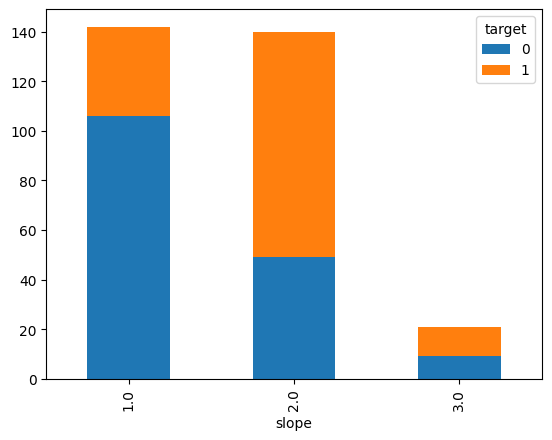

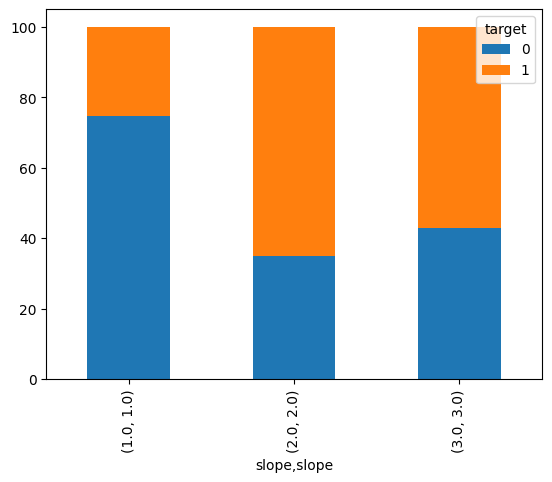

In [ ]:
df.groupby(['slope', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['slope', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

* No presenta ordinalidad.
* Slope descendente presenta mayor probabilidad de enfermedad cardiaca, seguido por plnao (muy similar) y por último, ascendente.

* **ca:** número de vasos principales coloreados por fluoroscopía (0-3).

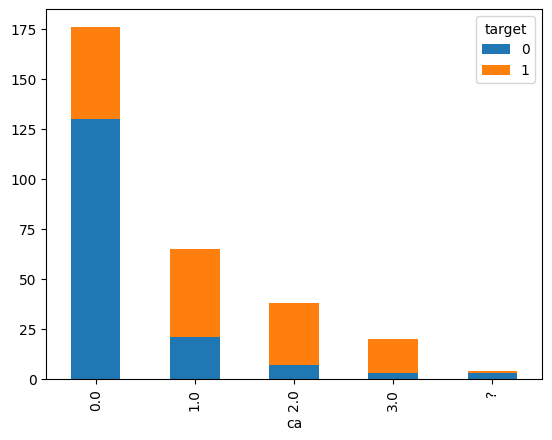

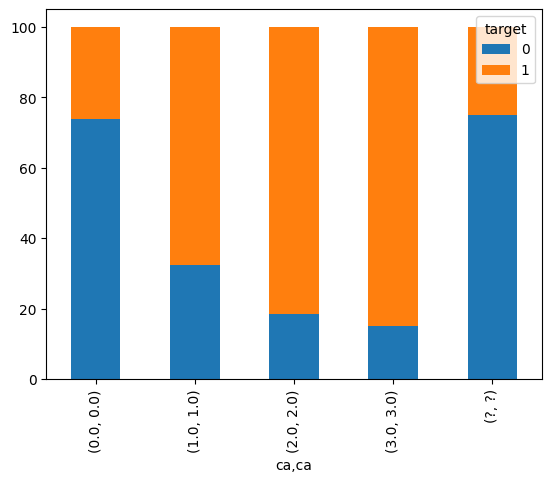

In [ ]:
df.groupby(['ca', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['ca', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

* Se observa ordinalidad.
* A mayor número de vasos sanguinos coloreados, mayor probabilidad de presentar enfermedad cardíaca.

* **thal:** resultado de la prueba de esfuerzo con talio (3 = normal; 6 = defecto fijo; 7 = defecto reversible).

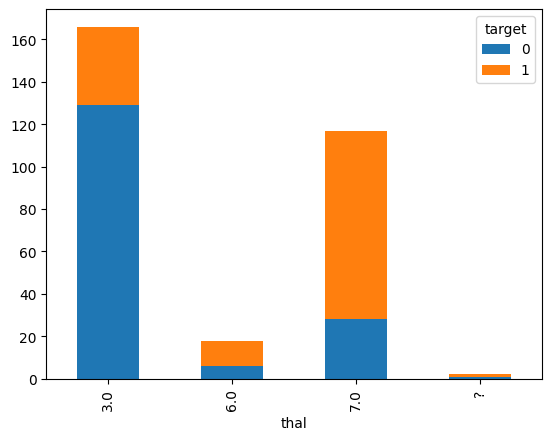

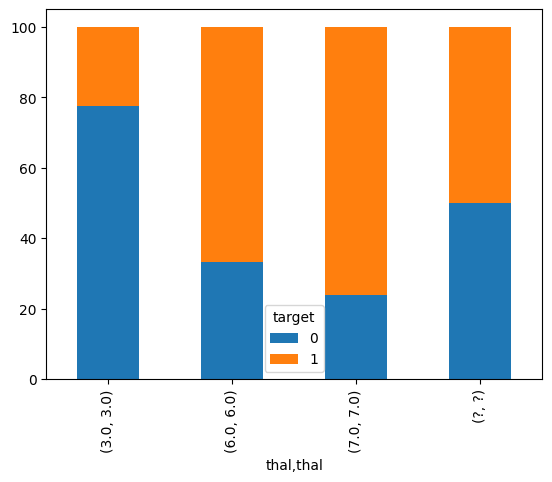

In [ ]:
df.groupby(['thal', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['thal', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

* Defecto visible, mayor probabilidad de enfermedad cardíaca.
* Seguido por defecto fijo.
* Y por último, normal.

* Se observa ordinalidad, pero se debe ajsutar la escala.

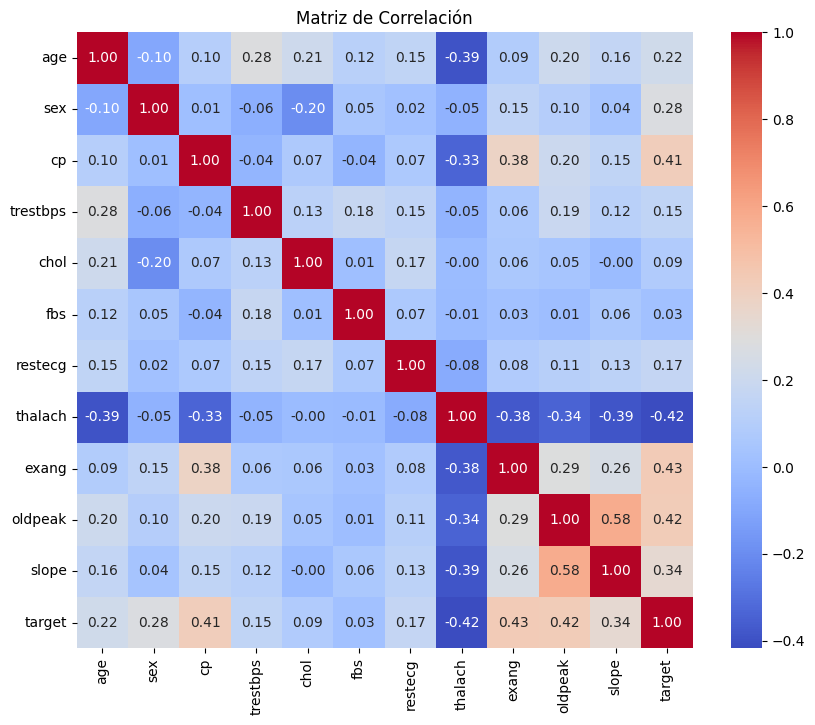

In [ ]:
df_matriz = df.copy()
import seaborn as sns
del df_matriz['ca'], df_matriz['thal'], df_matriz['AgeGroup'], df_matriz['trestbpsGroup'], df_matriz['oldpeakGroup'], df_matriz['thalachGroup']
correlation_matrix = df_matriz.corr()

# Mostrar como heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

Dejamos fuera las variables categóricas Ca y Thal.

Respecto a la varible objetivo/target:
* Age y edad presenta una positiva moderada correlación.
* Cp (tipo de dolor de pecho) presenta una positiva moderada correlación.
* Thalach (frecuencia cardíaca máxima alcanzada): negativa y fuerte correlación.
* Exang (angina inducida por ejercicio), oldpeak (depresión del ST inducida por el ejercicio respecto al reposo) y slope (pendiente del segmento ST durante el ejercicio): presentan una moderada positiva correlación.

### **Limpieza de datos**

La limpieza de datos es eliminar las inconsistencias encontradas en el análisis exploratorio de datos, como valores perdidos y valores atípicos.


#### **Imputación de datos**

Existen distintos métodos de imputación de datos:

**1. Si son menos de un <5%**: se puede eliminar o reemplazar nulos por moda (categóricos)/mediana (numéricos).

**2. Si es más de un 5%**: imputar usando los valores de las observaciones más cercanas (vecinos más similares).

**3. Si es más de un 30%**: se debe eliminar la variable.

**ca:** número de vasos principales coloreados por fluoroscopía (0-3).

In [ ]:
df_ori = df.copy()
df_ori.loc[df_ori['thal']== '?', 'thal'] = np.nan
df_ori.loc[df_ori['ca']== '?', 'ca'] = np.nan

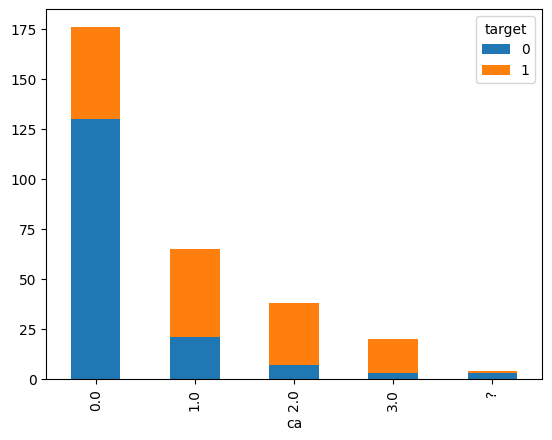

In [ ]:
df.groupby(['ca', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
import numpy as np
mode_ca = df['ca'].mode()
df.loc[df['ca']== '?', 'ca'] = np.nan
df['ca'].fillna(mode_ca[0], inplace=True)
mode_ca

/tmp/ipython-input-2037275804.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(mode_ca[0], inplace=True)


,ca
0,0.0


* **thal:** resultado de la prueba de esfuerzo con talio (3 = normal; 6 = defecto fijo; 7 = defecto reversible).

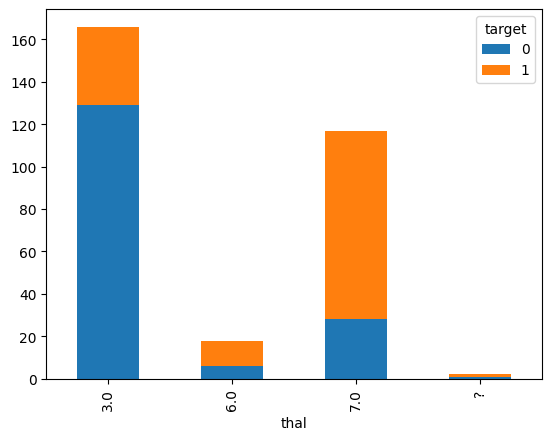

In [ ]:
df.groupby(['thal', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
mode_thal = df['thal'].mode()
df.loc[df['thal']== '?', 'thal'] = np.nan
df['thal'].fillna(mode_thal[0], inplace=True)
mode_thal

/tmp/ipython-input-1298461554.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].fillna(mode_thal[0], inplace=True)


,thal
0,3.0


#### **Agregación**
Agrupar categorías o números para reducir y mejorar calidad predictiva.

**age**

Creamos nueva variable de rango de edad y la dejamos ordinal.

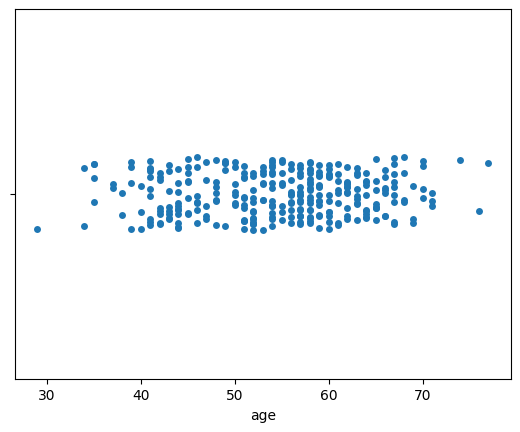

/tmp/ipython-input-454431375.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-454431375.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


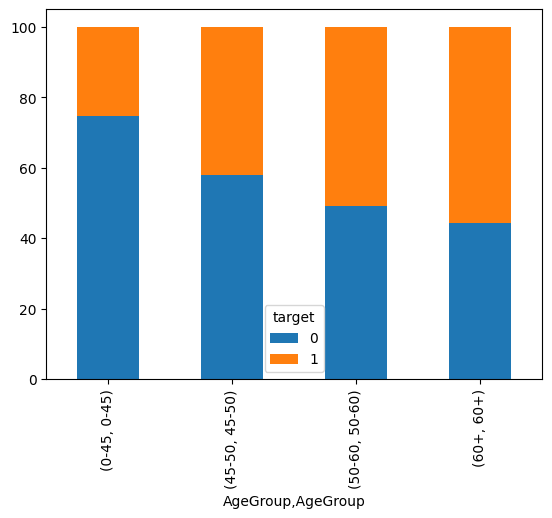

In [ ]:
import seaborn as sn
sn.stripplot(x='age', data=df)
plt.show()


# Agrupar la variable 'Age' en rangos
age_bins = [0, 45,50, 60,  df['age'].max()]
age_labels = ['0-45', '45-50', '50-60',  '60+']
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)


df.groupby(['AgeGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()


In [ ]:
age_bins = [0, 45,50, 60,  df['age'].max()]
age_labels = [0,1,2,3]
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

del df['age']

**cp: tipo de dolor de pecho**
(0 = típoco anginoso, 1 = atípico anginoso, 2 = no anginoso, 3 = asintomático)

atípico anginoso es similar a no anginoso

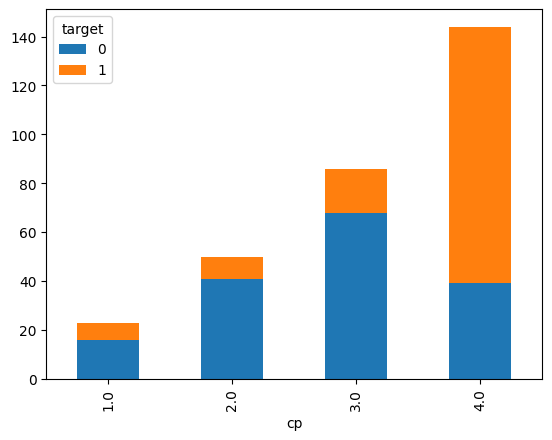

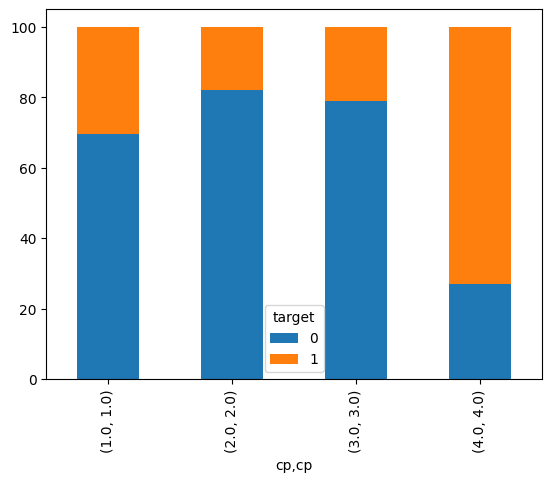

In [ ]:
from os import defpath
df.groupby(['cp', 'target']).size().unstack().plot.bar(stacked=True)
plt.show()
df.groupby(['cp', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
df.loc[df['cp']==1, 'cpGroup'] = 'típoco_anginoso'
df.loc[df['cp'].isin([2,3]), 'cpGroup'] = 'atípico_no_anginoso'
df.loc[df['cp'] == 4, 'cpGroup'] = 'asintomático'
df = pd.get_dummies(df, columns = ["cpGroup"], drop_first=True)

In [ ]:
df['cpGroup_típoco_anginoso']

,cpGroup_típoco_anginoso
0,True
1,False
2,False
3,False
4,False
...,...
298,True
299,False
300,False
301,False



**trestbps:** presión arterial en reposo (mm Hg).

/tmp/ipython-input-3191168158.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['trestbpsGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-3191168158.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['trestbpsGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


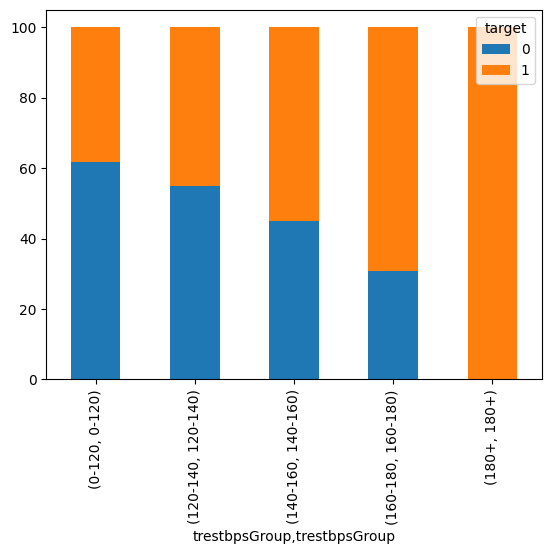

In [ ]:
bins = [0,  120, 140, 160,  180, df['trestbps'].max()]
labels = ['0-120', '120-140', '140-160', '160-180',  '180+']
df['trestbpsGroup'] = pd.cut(df['trestbps'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['trestbpsGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()



In [ ]:
trestbps_bins = [0,  120, 140, 160,  180, df['trestbps'].max()]
trestbps_labels = [0,1,2,3,4,]
df['trestbpsGroup'] = pd.cut(df['trestbps'], bins=trestbps_bins, labels=trestbps_labels, include_lowest=True)
del df['trestbps']

In [ ]:
df['trestbpsGroup']

,trestbpsGroup
0,2
1,2
2,0
3,1
4,1
...,...
298,0
299,2
300,1
301,1


restecg: resultados del electrocardiograma en reposo (0 = normal, 1 = anomalía, 2 = hipertrofia ventricular izquierda).

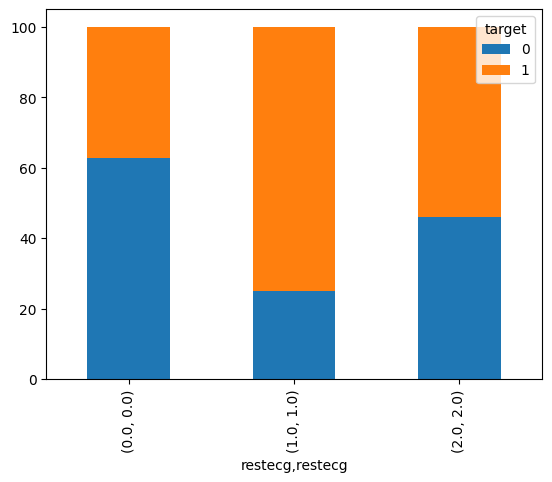

In [ ]:
df.groupby(['restecg', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
df['restecgNormal'] = 0
df.loc[df['restecg']==0, 'restecgNormal'] = 1

df['restecgHipertrofia'] = 0
df.loc[df['restecg']==0, 'restecgHipertrofia'] = 1

del df['restecg']

**thalach: frecuencia cardíaca máxima alcanzada.**

/tmp/ipython-input-4070611640.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['thalachGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-4070611640.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['thalachGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


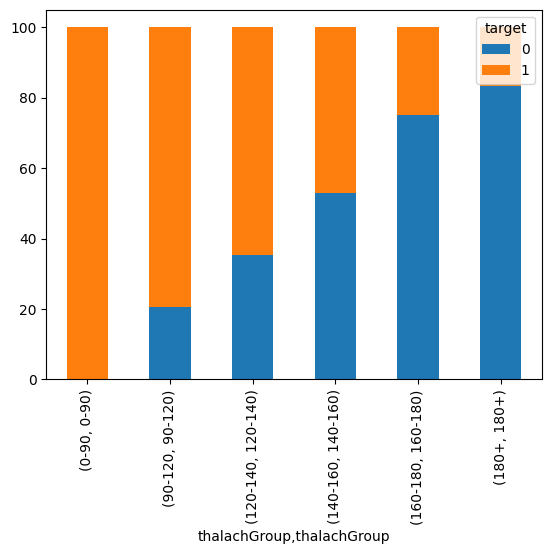

In [ ]:
bins = [0,  90, 120, 140, 160,  180, df['thalach'].max()]
labels = ['0-90', '90-120', '120-140', '140-160', '160-180',  '180+']
df['thalachGroup'] = pd.cut(df['thalach'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['thalachGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()



In [ ]:
bins = [0, 90, 120, 140, 160,  180, df['thalach'].max()]
labels = [0, 1, 2, 3, 4, 5]
df['thalachGroup'] = pd.cut(df['thalach'], bins=bins, labels=labels, include_lowest=True)
del df['thalach']

In [ ]:

df['thalachGroup']

,thalachGroup
0,3
1,1
2,2
3,5
4,4
...,...
298,2
299,3
300,1
301,4


* **oldpeak:** depresión del ST inducida por el ejercicio respecto al reposo.

/tmp/ipython-input-2017444531.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['oldpeakGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
/tmp/ipython-input-2017444531.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['oldpeakGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


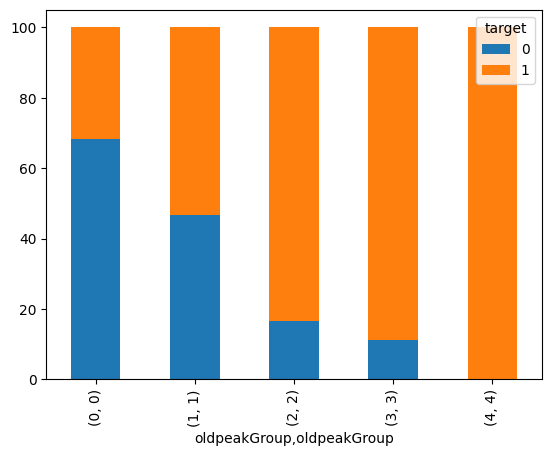

In [ ]:
bins = [0, 1, 2, 3, 5, df['oldpeak'].max()]
labels = [0,1,2,3,4]
df['oldpeakGroup'] = pd.cut(df['oldpeak'], bins=bins, labels=labels, include_lowest=True)


df.groupby(['oldpeakGroup', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()
del df['oldpeak']

slope: pendiente del segmento ST durante el ejercicio (0 = ascendente; 1 = plano; 2 = descendente).

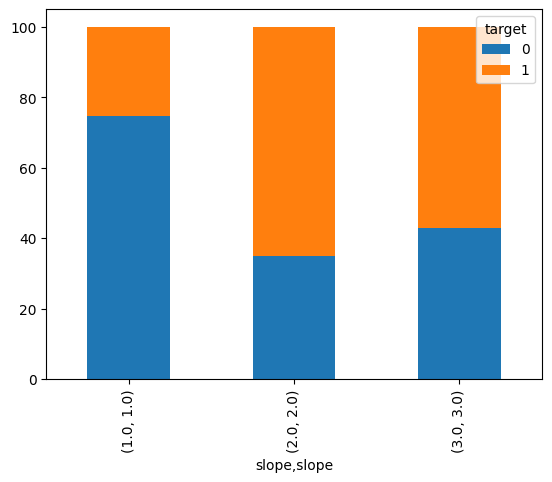

In [ ]:
df.groupby(['slope', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
df.loc[df['slope'] == 1, 'slope'] = 'ascendente'
df.loc[df['slope'] == 2, 'slope'] = 'plano'
df.loc[df['slope'] == 3, 'slope'] = 'descendente'

/tmp/ipython-input-4250288917.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ascendente' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['slope'] == 1, 'slope'] = 'ascendente'


In [ ]:
df['slope']

,slope
0,descendente
1,plano
2,plano
3,descendente
4,ascendente
...,...
298,plano
299,plano
300,plano
301,plano


In [ ]:
df = pd.get_dummies(df, columns = ["slope"], drop_first=True)


* **thal:** resultado de la prueba de esfuerzo con talio (3 = normal; 6 = defecto fijo; 7 = defecto reversible).

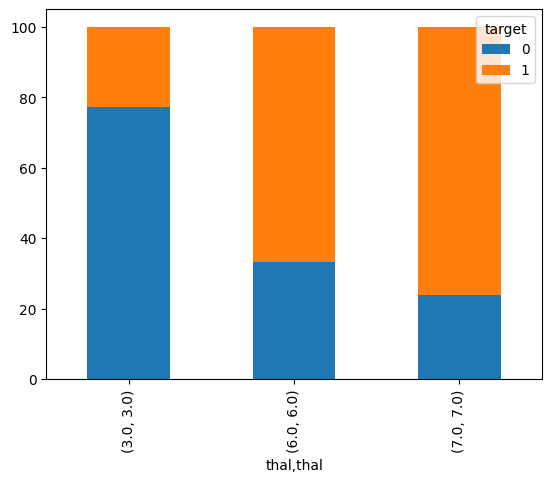

In [ ]:

df.groupby(['thal', 'target']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)
plt.show()

In [ ]:
df['thalAg'] = 0
df.loc[df['thal']=='3.0', 'thalAg'] = 1
df.loc[df['thal']=='6.0', 'thalAg'] = 2
df.loc[df['thal']=='7.0', 'thalAg'] = 3

In [ ]:

del df['thal']
df['thalAg']

,thalAg
0,2
1,1
2,3
3,1
4,1
...,...
298,3
299,3
300,3
301,1


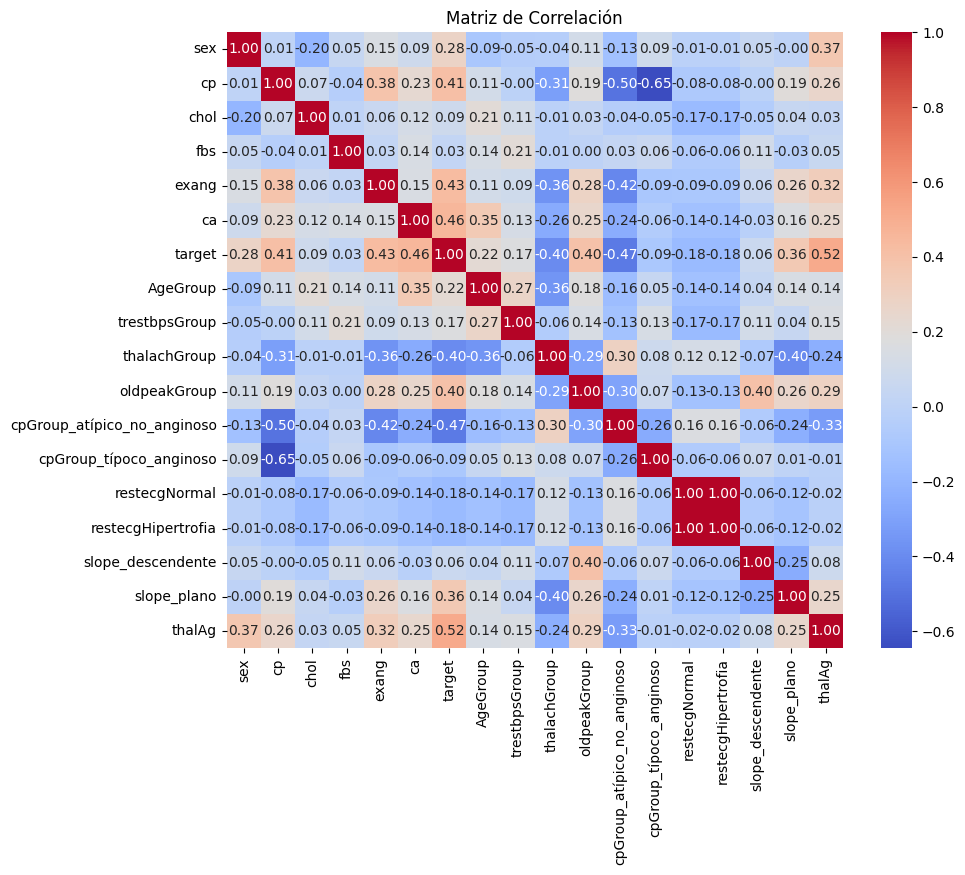

In [ ]:

import seaborn as sns
correlation_matrix = df.corr()

# Mostrar como heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación")
plt.show()

## **Selección de variables**

### Filter method

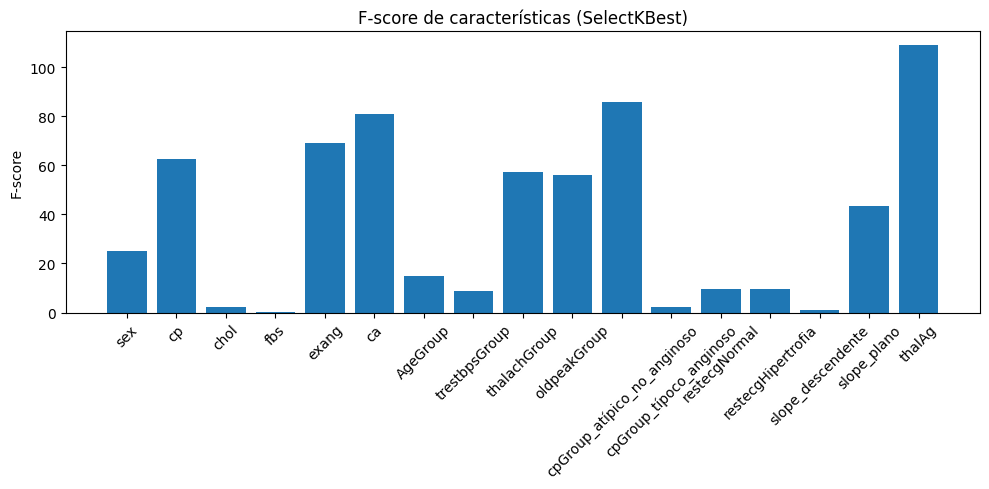

Características seleccionadas por SelectKBest (top 5):
['cp', 'exang', 'ca', 'cpGroup_atípico_no_anginoso', 'thalAg']


,sex,cp,chol,fbs,exang,ca,AgeGroup,trestbpsGroup,thalachGroup,oldpeakGroup,cpGroup_atípico_no_anginoso,cpGroup_típoco_anginoso,restecgNormal,restecgHipertrofia,slope_descendente,slope_plano,thalAg
0,24.978872,62.423779,2.199054,0.192237,69.020891,80.80061,14.854538,8.691306,57.140644,55.979699,85.931571,2.392683,9.598157,9.598157,1.150628,43.602005,109.163583


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = df.copy()
del X['target']
y = df['target']
feature_names = X.columns.tolist()

# Método de filtro: SelectKBest con f_regression (top 5)
selector_kbest = SelectKBest(score_func=f_regression, k=5)
selector_kbest.fit(X, y)
kbest_scores = selector_kbest.scores_
kbest_selected = selector_kbest.get_support(indices=True)
kbest_features = [feature_names[i] for i in kbest_selected]

# Método de filtro: VarianceThreshold (umbral = 1.0)
selector_var = VarianceThreshold(threshold=1.0)
selector_var.fit(X)
variances = selector_var.variances_
var_selected = selector_var.get_support(indices=True)
var_features = [feature_names[i] for i in var_selected]

# Graficar puntuaciones de SelectKBest
plt.figure(figsize=(10, 5))
plt.bar(range(len(kbest_scores)), kbest_scores, align="center")
plt.xticks(range(len(kbest_scores)), feature_names, rotation=45)
plt.title("F-score de características (SelectKBest)")
plt.ylabel("F-score")
plt.tight_layout()
plt.show()

# Mostrar resultados
print("Características seleccionadas por SelectKBest (top 5):")
print(kbest_features)
aux1 = pd.DataFrame(data=[kbest_scores.tolist()], columns =feature_names)
display(aux1)


Variables de menor impacto:
* chol
* fbs
* cpGroup_atípico_no_anginoso
* restecg_Hipertrofia

In [ ]:
df['AgeGroup'] = df['AgeGroup'].astype(int)
df['trestbpsGroup'] = df['trestbpsGroup'].astype(int)
df['thalachGroup'] = df['thalachGroup'].astype(int)
df['oldpeakGroup'] = df['oldpeakGroup'].astype(int)
df['ca'] = df['ca'].astype(float)
df['ca'] = df['ca'].astype(int)
df['sex'] = df['sex'].astype(int)
df['cp'] = df['cp'].astype(int)
df['chol'] = df['chol'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

In [ ]:
X_test

,sex,cp,chol,fbs,exang,ca,AgeGroup,trestbpsGroup,thalachGroup,oldpeakGroup,cpGroup_atípico_no_anginoso,cpGroup_típoco_anginoso,restecgNormal,restecgHipertrofia,slope_descendente,slope_plano,thalAg
76,1.0,4.0,258.0,0.0,1.0,1.0,2,1,3,2,False,False,0,0,False,True,3
132,1.0,2.0,204.0,0.0,0.0,0.0,0,1,5,0,True,False,0,0,False,False,1
205,1.0,4.0,309.0,0.0,1.0,3.0,0,2,3,0,False,False,0,0,False,True,3
292,1.0,4.0,169.0,0.0,1.0,0.0,0,0,3,2,False,False,1,1,True,False,2
66,1.0,3.0,185.0,0.0,0.0,0.0,2,1,3,2,True,False,0,0,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1.0,3.0,188.0,0.0,0.0,3.0,1,0,2,1,True,False,1,1,False,True,3
269,1.0,3.0,180.0,0.0,0.0,0.0,0,1,3,0,True,False,1,1,False,False,1
165,1.0,4.0,207.0,0.0,1.0,0.0,2,1,4,0,False,False,1,1,False,False,3
196,1.0,1.0,234.0,1.0,0.0,1.0,3,2,2,0,False,True,0,0,False,True,1


### Entrenamiento de modelos

Dividir entre data de entrenamiento y prueba dataset original y dataset con columnas filtradas.

In [ ]:

from sklearn.model_selection import train_test_split
X = df.copy()
del X['target']
y = df['target']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [ ]:
X_train_filter = X_train.copy()
X_test_filter = X_test.copy()


del X_train_filter['chol'], X_train_filter['fbs'],  X_train_filter['cpGroup_atípico_no_anginoso'], X_train_filter['restecgHipertrofia']

del X_test_filter['chol'], X_test_filter['fbs'], X_test_filter['cpGroup_atípico_no_anginoso'], X_test_filter['restecgHipertrofia']

#### Regresión Logística

**Con todos las variables**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores hiperparámetros: {'class_weight': None, 'max_iter': 100}


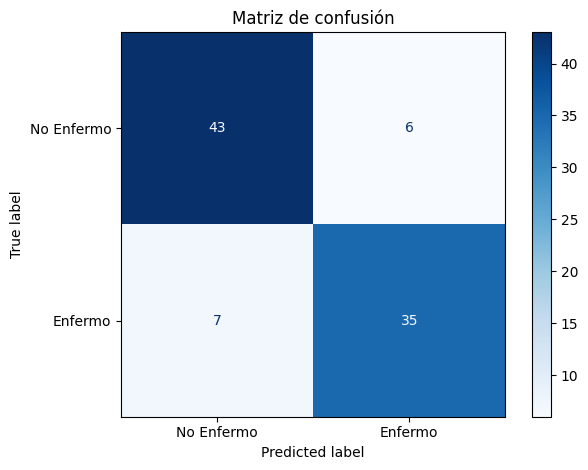

Accuracy del modelo: 0.86
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.85      0.83      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


#Definir el grid de hiperparámetros

param_grid = {
    'max_iter' : [100,1000,1500],
    'class_weight' : ['balanced', None]
}


# Ajustar modelo de regresión logística
modelo = LogisticRegression()

grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy')



grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
reg_log_v1 = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
y_pred = reg_log_v1.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
rep_reg_log_v1 = classification_report(y_test, y_pred)

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No Enfermo", "Enfermo"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")
print("Reporte de clasificación:")
print(rep_reg_log_v1)


Accuracy al 86% --> Solo 13 datos son mal clasificados.
* Un Recall de 88% en la clase negativa (No enfermo)
  * El modelo identificó correctamente el 88% de los casos que realmente no estan enfermo.
* Un Recall de 83% en la clase positiva (Enfermo)
  * El modelo identificó correctamente el 83% de los casos que realmente estan enfermo.

¿Y si filtramos las features?

**Con variables filtradas**

Filter method - Variables de menor impacto:
* chol
* fbs
* cpGroup_atípico_no_anginoso
* restecg_Hipertrofia

Mejores hiperparámetros: {'class_weight': None, 'max_iter': 100}


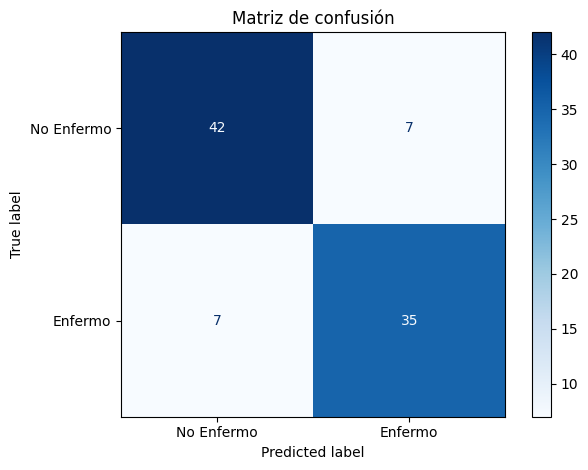

Accuracy del modelo: 0.85


In [ ]:

#Definir el grid de hiperparámetros

param_grid = {
    'max_iter' : [100,1000,1500],
    'class_weight' : ['balanced', None]
}


# Ajustar modelo de regresión logística
modelo = LogisticRegression()

grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy')



grid_search.fit(X_train_filter, y_train)

# Mejor modelo encontrado
reg_log_v2 = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
y_pred = reg_log_v2.predict(X_test_filter)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No Enfermo", "Enfermo"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")

El primer modelo presenta mejor accuracy que el filtrado para Regresión Lineal.

#### Random Forest
**Con todos las variables**

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


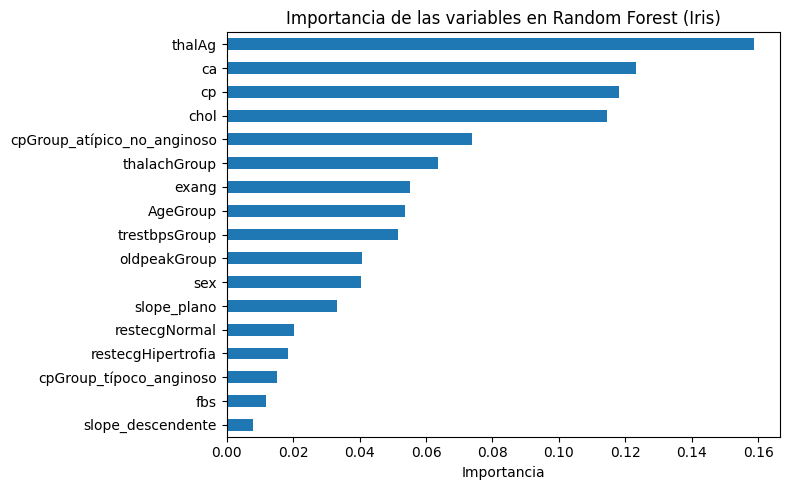

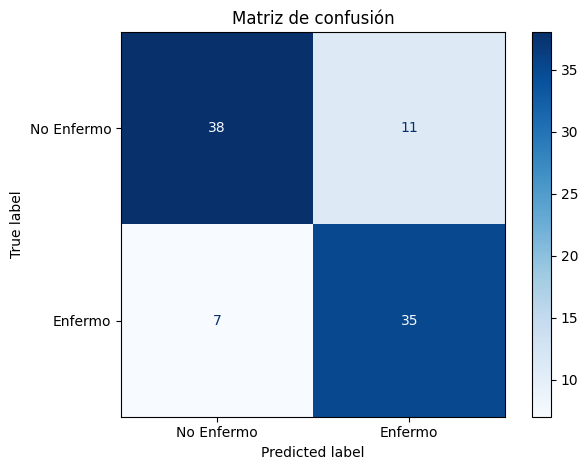

Accuracy del modelo: 0.85


In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt


# Entrenar modelo Random Forest
rf = RandomForestClassifier( random_state=42)
feature_names = X.columns.tolist()


# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5]
}

# Configurar GridSearchCV
rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
)

# Ajustar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Mejor modelo encontrado
rf_v1 = rf.best_estimator_
print("Mejores hiperparámetros:", rf.best_params_)


# Evaluar el modelo
y_pred = rf_v1.predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

# Importancia de las variables
importancia = pd.Series(rf_v1.feature_importances_, index=feature_names)
importancia.sort_values().plot(kind='barh', figsize=(8, 5), title='Importancia de las variables en Random Forest (Iris)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No Enfermo", "Enfermo"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")

Presenta peor performance que Regresión Logística, en términos de número de casos mal clasificados, este modelo presenta 11 falsos positivos (Clasifico como enfermo cuando realmente son sanos) mientras Reg Logistica v1, solo 6.

**Con variables filtradas**

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


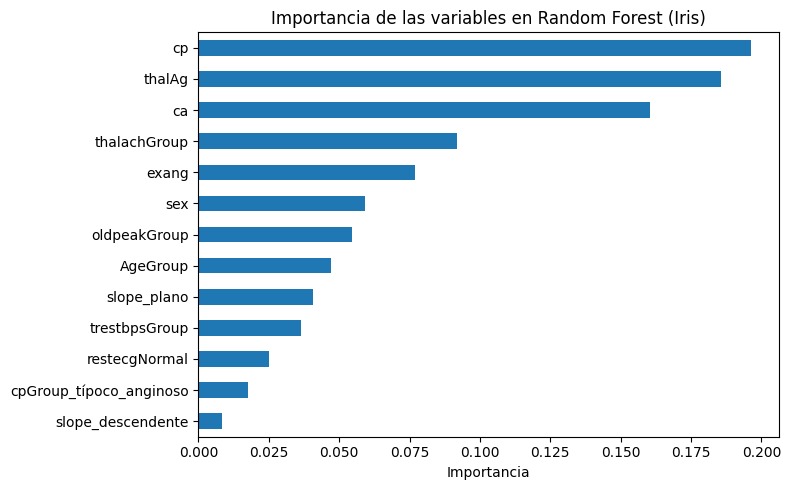

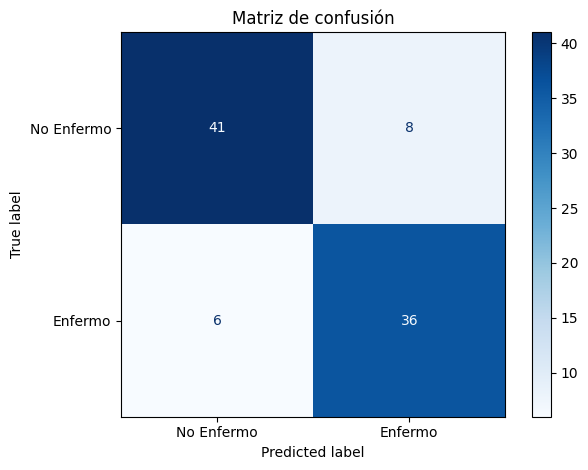

Accuracy del modelo: 0.85


In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt



# Entrenar modelo Random Forest
rf = RandomForestClassifier( random_state=42)
feature_names = X_train_filter.columns.tolist()


# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5]
}

# Configurar GridSearchCV
rf2 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
)

# Ajustar el modelo con los datos de entrenamiento
rf2.fit(X_train_filter, y_train)

# Mejor modelo encontrado
rf_v2 = rf2.best_estimator_
print("Mejores hiperparámetros:", rf2.best_params_)


# Evaluar el modelo
y_pred = rf_v2.predict(X_test_filter)
matriz = confusion_matrix(y_test, y_pred)

# Importancia de las variables
importancia = pd.Series(rf_v2.feature_importances_, index=feature_names)
importancia.sort_values().plot(kind='barh', figsize=(8, 5), title='Importancia de las variables en Random Forest (Iris)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No Enfermo", "Enfermo"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")

Presenta mejor comportamiento respecto al primer modelo de Random Forest, en términos de falsos positivos, pero Regresión Logística (Full Dataset) presenta menores casos mal clasificados.

###Gradient Boosting
**Con todos las variables**

Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Importancia de las variables:
sex                            0.022167
cp                             0.263591
chol                           0.047449
fbs                            0.000129
exang                          0.011576
ca                             0.184522
AgeGroup                       0.021080
trestbpsGroup                  0.009141
thalachGroup                   0.022521
oldpeakGroup                   0.012043
cpGroup_atípico_no_anginoso    0.054790
cpGroup_típoco_anginoso        0.004814
restecgNormal                  0.005278
restecgHipertrofia             0.005877
slope_descendente              0.000000
slope_plano                    0.021192
thalAg                         0.313830
dtype: float64


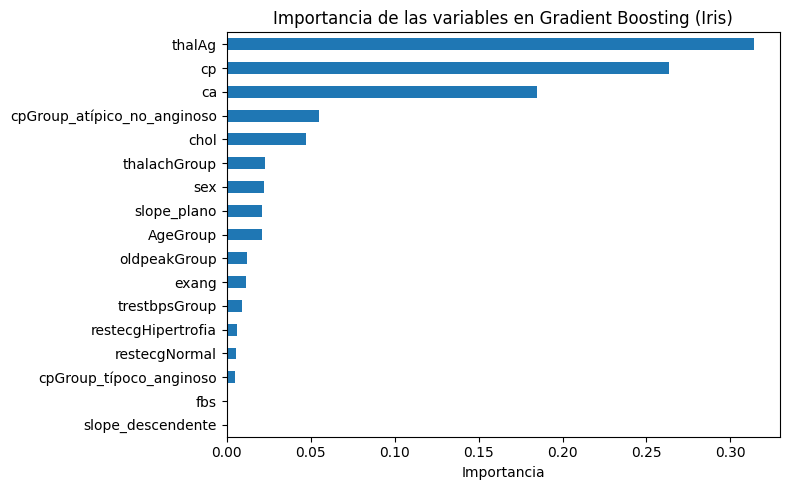

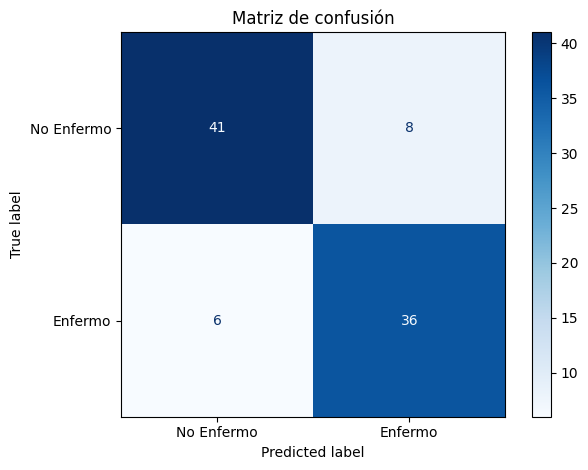

Accuracy del modelo: 0.85


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


feature_names = X_train.columns.tolist()

# Definir el modelo base
gb1 = GradientBoostingClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Configurar GridSearchCV
gb_v1 = GridSearchCV(
    estimator=gb1,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Ajustar el modelo con los datos de entrenamiento
gb_v1.fit(X_train, y_train)

# Mejor modelo encontrado
gb_best_v1 = gb_v1.best_estimator_
print("Mejores hiperparámetros:", gb_v1.best_params_)

# Evaluar el modelo
y_pred = gb_best_v1.predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

# Importancia de las variables
importancia_gb = pd.Series(gb_best_v1.feature_importances_, index=feature_names)
print("Importancia de las variables:")
print(importancia_gb)

# Visualización de importancia
importancia_gb.sort_values().plot(kind='barh', figsize=(8, 5), title='Importancia de las variables en Gradient Boosting (Iris)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No Enfermo", "Enfermo"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")

Mismo desempeño que Random Forest con variables filtradas.

**Con variables filtradas**

Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Importancia de las variables:
sex                        0.021230
cp                         0.308273
exang                      0.018140
ca                         0.185708
AgeGroup                   0.025906
trestbpsGroup              0.011154
thalachGroup               0.031153
oldpeakGroup               0.015753
cpGroup_típoco_anginoso    0.012281
restecgNormal              0.007428
slope_descendente          0.000546
slope_plano                0.021775
thalAg                     0.340654
dtype: float64


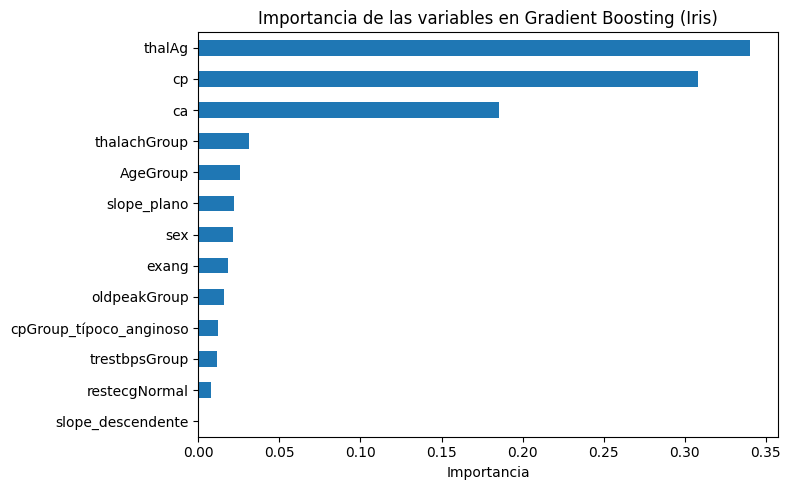

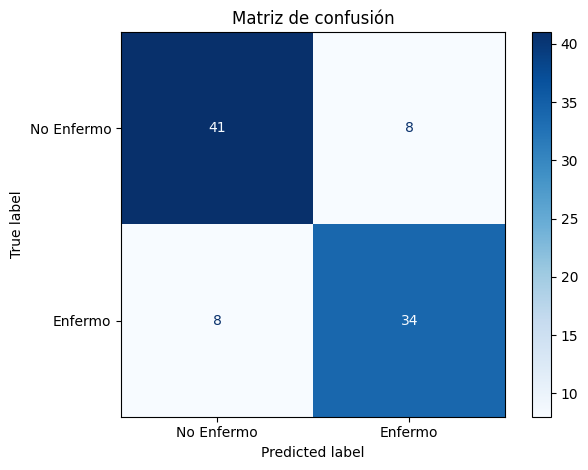

Accuracy del modelo: 0.85


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


feature_names = X_train_filter.columns.tolist()

# Definir el modelo base
gb2 = GradientBoostingClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Configurar GridSearchCV
gb_v2 = GridSearchCV(
    estimator=gb2,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Ajustar el modelo con los datos de entrenamiento
gb_v2.fit(X_train_filter, y_train)

# Mejor modelo encontrado
gb_best_v2 = gb_v2.best_estimator_
print("Mejores hiperparámetros:", gb_v2.best_params_)

# Evaluar el modelo
y_pred = gb_best_v2.predict(X_test_filter)
matriz = confusion_matrix(y_test, y_pred)

# Importancia de las variables
importancia_gb = pd.Series(gb_best_v2.feature_importances_, index=feature_names)
print("Importancia de las variables:")
print(importancia_gb)

# Visualización de importancia
importancia_gb.sort_values().plot(kind='barh', figsize=(8, 5), title='Importancia de las variables en Gradient Boosting (Iris)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No Enfermo", "Enfermo"])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión")
plt.tight_layout()
plt.show()

# Resultados
print(f"Accuracy del modelo: {accuracy:.2f}")

El modelo de Grandient Boosting con todas las variables presenta mejor desempeño que el filtrado.



Logistic Regression full
Random Forest full


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gradient Boosting full
Logistic Regression filter
Random Forest filter
Gradient Boosting filter


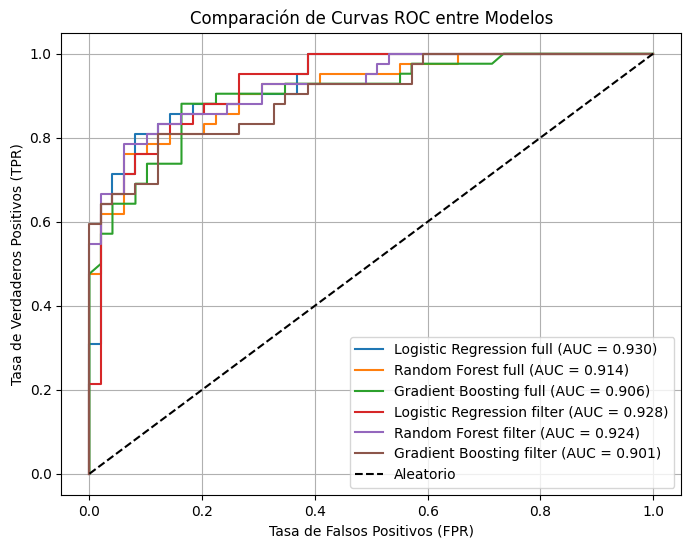

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Inicializar modelos
modelos = {
    "Logistic Regression full": reg_log_v1,
    "Random Forest full": rf_v1,
    "Gradient Boosting full": gb_best_v1,
    "Logistic Regression filter": reg_log_v2,
    "Random Forest filter": rf_v2,
    "Gradient Boosting filter": gb_best_v2
}

# Graficar curvas ROC
plt.figure(figsize=(8, 6))
for nombre, modelo in modelos.items():
  print(nombre)
  if "full" in nombre:
    modelo.fit(X_train, y_train)
    y_prob = modelo.predict_proba(X_test)[:, 1]

  else:
    modelo.fit(X_train_filter, y_train)
    y_prob = modelo.predict_proba(X_test_filter)[:, 1]

  fpr, tpr, _ = roc_curve(y_test, y_prob)
  auc = roc_auc_score(y_test, y_prob)
  plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC entre Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
print(rep_reg_log_v1)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.85      0.83      0.84        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



**Si bien todos los medelos presentan desempeños similares, el Random Forest filtrado presenta el mejor performance en términos de Re-Call que es mi variable relevante para este problema, dado que me interesa medir se lo más preciso en términos de predecir aquellos pacientes enfermos.**



